# Project: Investigate a Dataset - Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description 
#### Dataset link : https://www.kaggle.com/joniarroba/noshowappointments
The Investigate a Dataset project!, The dataset collects information from more than 100k medical appointments in Brazil
and is focused on the question of whether or not patients show up for their appointment. The Project Medical Appointments
No Shows is investigating Medical Appointment No Shows dataset which contains historical data for more than 110K 
appointments made accross different medical facilities in Brazil for more than 60k patients
A number of characteristics about the patient are included in each row <br>
1 - PatientId <br>
Identification of a patient<br>
2 - AppointmentID<br>
Identification of each appointment<br>
3 - Gender<br>
Male or Female <br>
4 - DataMarcacaoConsulta<br>
The day of the actuall appointment, when they have to visit the doctor.<br>
5 - DataAgendamento<br>
The day someone called or registered the appointment, this is before appointment of course.<br>
6 - Age<br>
How old is the patient.<br>
7 - Neighbourhood<br>
Where the appointment takes place.<br>
8 - Scholarship<br>
Does the patient have a scholarship or not? 1 = yes , 0 = no<br>
9 - Hipertension<br>
Does the patient he suffer from Hipertension ? 1 = yes , 0 = no<br>
10 - Diabetes<br>
Does the patient has diabetes ? 1 = yes , 0 = no<br>
11 - Alcoholism<br>
Is the patient addicted to alcohol? 1 = yes , 0 = no<br>
12 - Handcap<br>
Does the patient have a disability? 1 = yes , 0 = no<br>
SMS_received<br>
if the paients recevied sms reminding them of the appointment? 1 = yes , 0 = no<br>
No-show<br>
whether or not patients show up for their appointment ? <br>
### Question(s) for Analysis
1)Is there any relationship between attributes?<br>
2)which gender more committed to the appointment ?<br>
3)Is there a relationship between age and goes to doctor ?<br>
4)Is there a relationship between Neighbourhood and attending the appointment ?<br>
5)What are the insights and trends in Binaty variables scholarship - hipertension - diabetes - alcoholism - handcap ?<br>
6)Does the length of diffenece between ScheduledDay and AppointmentDay affect the attending of the appointment?

In [145]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.3)

<a id='wrangling'></a>
## Data Wrangling
>load the data, check for cleanliness, and then trim and clean the dataset for analysis.
### General Properties

In [146]:
#loading the data
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [147]:
df.shape

(110527, 14)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [149]:
# summry statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [150]:
#checking null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [151]:
#checking duplicated rows
df.duplicated().sum()

0

In [152]:
list(df.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

>#### - No duplicate or null values.
>#### - We Need to Change Data Types of some columns 
>#### - we Need to drop rows in age which is less than 0 
>#### - we need to make new column count the differnece between 'ScheduledDay'and'AppointmentDay'

## Data Cleaning

>#### We Will Change<br> PatientId: float >> string<br> AppointmentID: int >> string

In [153]:
df['PatientId'] = df['PatientId'].apply(int).apply(str)
df['AppointmentID'] = df['AppointmentID'].apply(str)

>### we will convert 'ScheduledDay'and 'AppointmentDay' from string to date so make it easier if we need <br> to extract day or month or year from date 

In [154]:
#Change columns scheduleday and appointmentday to date and spliting time from day
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

>#### we will convert column 'No-show' from string  to binary 0 or 1 only <br> we will change 'Handcap' column to binary 0 or 1 only 

In [155]:
#Change column Handcap to binary value (0 or 1) 
df['Handcap'] = df['Handcap'].apply(lambda x: 0 if x == 0 else 1)
#Change columns No-show to binary 
df['No-show'] = df['No-show'].map({'No':0, 'Yes':1})

>#### we will remove unvalid aged 

In [156]:
# drop age < 0
df.drop(df[df['Age'] < 0].index, inplace = True)

>#### we will create new column with diffence between days and then drop unvalid values

In [157]:
df['Day_difference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [158]:
df.Day_difference.value_counts().sort_index().head()

-6        1
-1        4
 0    38562
 1     5213
 2     6725
Name: Day_difference, dtype: int64

In [159]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_difference
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934,10.183794
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445,15.255034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [160]:
#there is unvalid difference values between AppointmentDay and ScheduledDay we will drop them 
df.drop(df[df['Day_difference'] < 0].index, inplace = True)

In [161]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_difference
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,0.201898,10.184345
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,0.401419,15.255153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1) Is there any relationship between attributes?

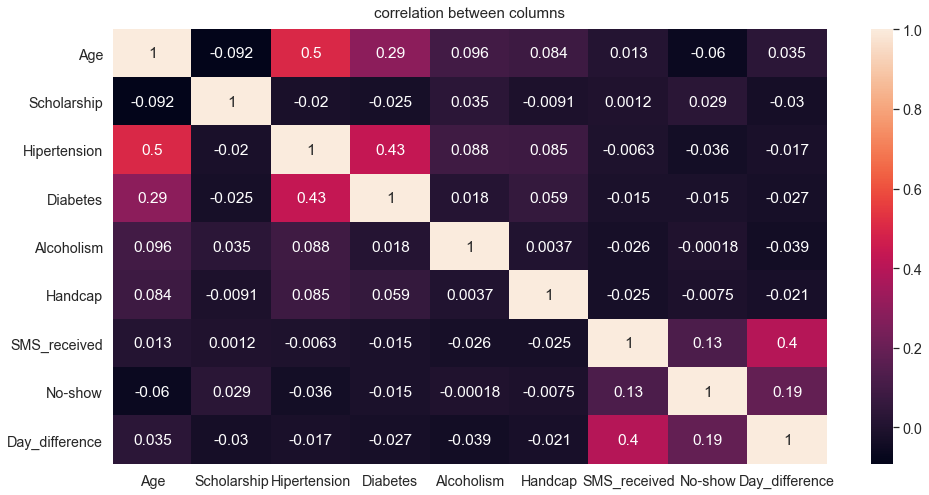

In [162]:
#correlation heatmap to find relation between columns
corr = df.corr()
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(corr,annot=True)
heatmap.set_title('correlation between columns', fontdict={'fontsize':15}, pad=12);

### We notice that there are columns with high correlation i will mention them only :
### SMS_received with Day_difference correlation 0.4 <br> Age with Hipertension correlation 0.5 <br>Hipertension with diabetes with 0.43

### Research Question 2 ) which gender more committed to the appointment ?

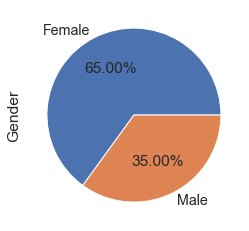

In [163]:
gender = ['Female', 'Male']
df['Gender'].value_counts().plot.pie(labels = gender, autopct='%1.2f%%');

### we can see that Females more committed to the appointments than males<br> we can conclude that gender affect No_show

### Research Question 3) Is there a relationship between age and goes to doctor ?

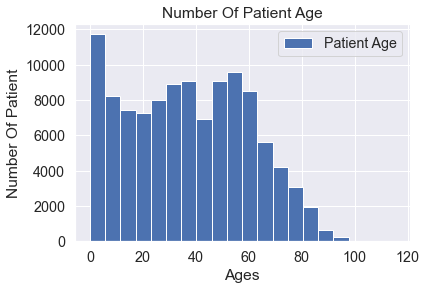

In [164]:
df.Age.hist(alpha= 1, bins=20, label='Patient Age');
plt.title('Number Of Patient Age')
plt.xlabel('Ages')
plt.ylabel('Number Of Patient')
plt.legend();

### yes , children who are 5 year and less are frequently goes to doctor 

### Research Question 4) Is there a relationship between Neighbourhood and attending the appointment ?

In [165]:
neighbour_df = pd.DataFrame()
neighbour_df['total_appointments'] = df.groupby(by='Neighbourhood')['No-show'].count()
neighbour_df['show_appointments'] = df.groupby(by='Neighbourhood')['No-show'].sum()
neighbour_df.reset_index(inplace=True)

In [166]:
neighbour_df

,Neighbourhood,total_appointments,show_appointments
0,AEROPORTO,8,1
1,ANDORINHAS,2262,521
2,ANTÔNIO HONÓRIO,271,50
3,ARIOVALDO FAVALESSA,282,62
4,BARRO VERMELHO,423,91
...,...,...,...
76,SÃO JOSÉ,1977,428
77,SÃO PEDRO,2448,515
78,TABUAZEIRO,3131,572
79,UNIVERSITÁRIO,152,32


In [167]:
high_appointment_neigh = neighbour_df.sort_values('total_appointments',ascending=False).head(10)
high_appointment_neigh

,Neighbourhood,total_appointments,show_appointments
38,JARDIM CAMBURI,7717,1465
43,MARIA ORTIZ,5805,1219
59,RESISTÊNCIA,4430,905
39,JARDIM DA PENHA,3877,631
36,ITARARÉ,3514,923
10,CENTRO,3334,703
78,TABUAZEIRO,3131,572
66,SANTA MARTHA,3131,496
40,JESUS DE NAZARETH,2853,696
8,BONFIM,2773,550


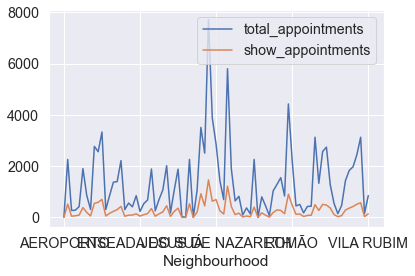

In [168]:
neighbour_df.plot(x="Neighbourhood", y=["total_appointments", "show_appointments"])
plt.show()

### we can see that Neighbourhood affected the number of appiontments the paitents made
### we can see top 10 Neighbourhood that peaple live in make an appiontments with doctors 

### Research Question 5) What are the insights and trends in Binaty variables scholarship - hipertension - diabetes - alcoholism - handcap ?

In [169]:
#list of the binary variables
binary_variables = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism','Handcap', 'SMS_received', 'No-show']
#Capturing the relevant data and wrangling it for conclusions
binary = df[binary_variables].stack(level=0)
binary = pd.DataFrame(binary)
binary.reset_index(drop=False, inplace =True)
binary.columns = ['level_0', 'level_1', 'value']

In [170]:
(binary.groupby('level_1')['value'].sum() / binary.level_1.value_counts()) * 100

Alcoholism       3.040146
Diabetes         7.186869
Handcap          2.025859
Hipertension    19.725663
No-show         20.189828
SMS_received    32.104306
Scholarship      9.827092
dtype: float64

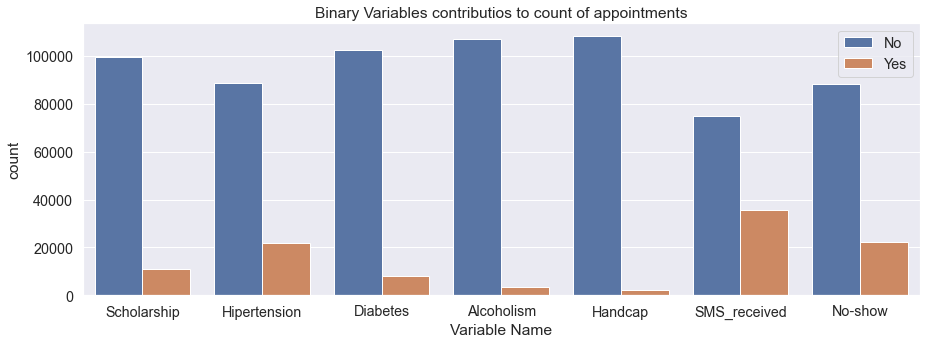

In [171]:
plt.figure(figsize=[15,5]);
sns.countplot(data=binary, x='level_1', hue='value');
plt.title('Binary Variables contributios to count of appointments');
plt.xlabel('Variable Name');
plt.legend(['No', 'Yes']);

### we can see <br>Almost 10% of all appointments made were for patients have scholarship<br>20% of all appointments made were for patients suffering from Hypertension<br>7% of all appointments made were for patients suffering from Hypertension<br>3% of all appointments made were for patients suffering from alcohol problem<br>2% of all appointments made were for patients are handicapped<br>32% of all appointments made were for patients have received remider sms's about appointment timing

### Research Question 6) Does the length of diffenece between ScheduledDay and AppointmentDay affect the attending of the appointment?

In [172]:
waitTime = df.groupby('No-show')['Day_difference'].mean()
waitTime

No-show
0     8.754759
1    15.835484
Name: Day_difference, dtype: float64

Text(0, 0.5, 'waitTime values')

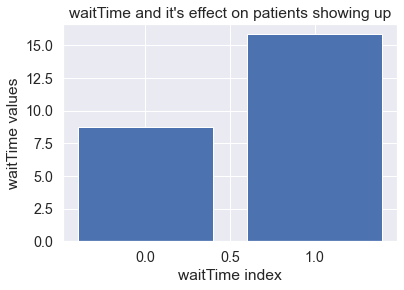

In [173]:
plt.bar(waitTime.index, waitTime.values)
plt.title("waitTime and it's effect on patients showing up")
plt.xlabel('waitTime index')
plt.ylabel('waitTime values')

### this indcate that patients who attend have a less waiting time than patients who don’t<br>patients whom didn't show up have an average of 15 days of waiting before the appointment<br>patients whom did show up have an average of 8 days of waiting before the appointment¶


### Descriptive statistics
#### Summarizing features and providing quantative summary about the features in dataset

In [174]:
df.drop(columns='Day_difference',inplace=True)

In [175]:
table = df.groupby('No-show').mean().iloc[:,1:]
table

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,
0,0.093904,0.204394,0.073838,0.030417,0.020792,0.291337
1,0.115533,0.169042,0.064085,0.030340,0.018150,0.438469


In [176]:
def get_pie_chart(data, title):
  i, j = 0, 0
  fig, ax = plt.subplots(2, 3, figsize=(15, 8))

  for index, value in data.items():
    ax[i, j].pie(x=[value, 1-value], labels=[True, False], 
                 autopct='%1.1f%%', textprops={'fontsize': 14})
    ax[i, j].set_title(index, size=14)
    
    j += 1
    if j == 3:
      j = 0
      i = 1

  fig.suptitle(title, size=20)
  plt.show()

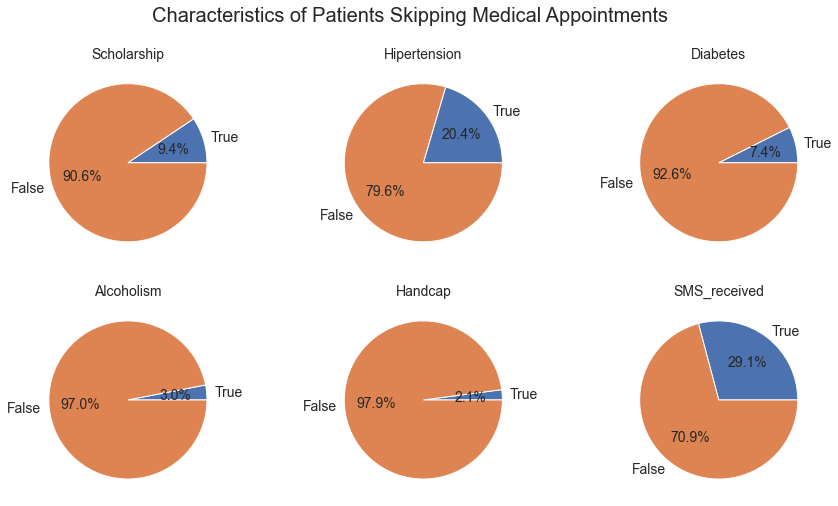

In [177]:
get_pie_chart(table.loc[0, :], 'Characteristics of Patients Skipping Medical Appointments')

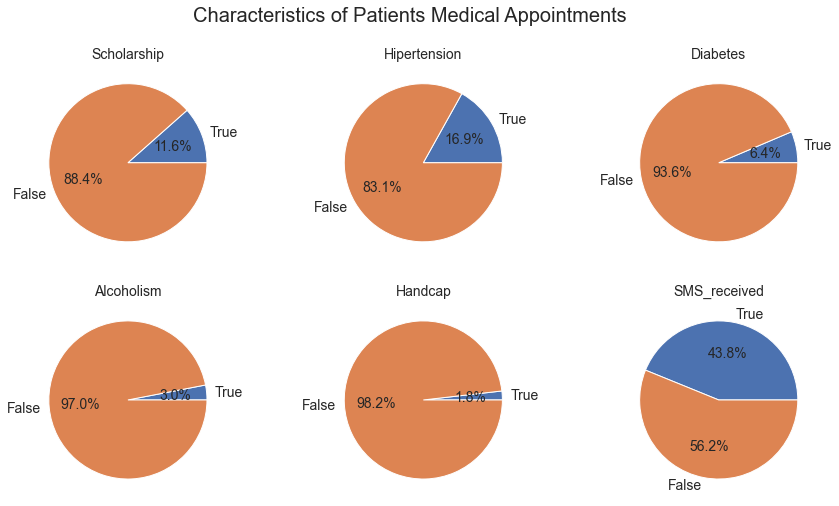

In [178]:
get_pie_chart(table.loc[1, :], 'Characteristics of Patients Medical Appointments')

### this indcate that patients who attend have a less waiting time than patients who don’t<br>patients whom didn't show up have an average of 15 days of waiting before the appointment<br>patients whom did show up have an average of 8 days of waiting before the appointment¶


<a id='conclusions'></a>
## Conclusions
### Important features to determine no-show are age, hypertension, SMS Received, scholarship and diabete<br>Children are the most common who go th the doctor <br>Hypertension is an important characterstic of patients with higher attendance frequency<br>Showing rate for women is higher the showing rate for men <br>Their is no relation of showing up wrt alcholism and handicaps<br>there is Neighbourhood are active than others<br>There is relation between number of delays days and number of people who shows up <br>
### Limitations
#### i believe if we had some information about the level of income of the patients or medical price for the appointments it would be very beneficial, leading us to do further investagation